## Dataset Airbnb NYC https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data AB_NYC_2019.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder



In [2]:
# Cargar el dataset
file_path = "../Data/airbnb_nyc_clean.csv"  # Ruta del archivo subido
df = pd.read_csv(file_path)

In [3]:
# Mostrar información general del dataset
print("Información del Dataset:")
print(df.info())

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  constru

Información del Dataset:
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):

dtypes: bool(1), float64(11), int64(2), object(9)
memory usage: 11.7+ MB


In [4]:
# Mostrar las primeras filas del dataset
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,13.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.0,124.0,3.0,0.0,2019-06-14,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,blank,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,74.0,13.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [5]:
# Descripción estadística de las columnas numéricas
print("\n Descripción Estadística (13 columnas Numéricas):")
print(df.describe())


 Descripción Estadística (13 columnas Numéricas):
                 id       host_id           lat          long  \
count  6.930500e+04  6.930500e+04  69305.000000  69305.000000   
mean   2.015746e+07  4.929192e+10     40.728070    -73.949036   
std    1.109105e+07  2.854010e+10      0.055973      0.050470   
min    1.001254e+06  1.303496e+08     40.499790    -74.249840   
25%    1.057049e+07  2.459948e+10     40.688540    -73.982790   
50%    2.013964e+07  4.915407e+10     40.722650    -73.954390   
75%    2.970878e+07  7.406137e+10     40.762730    -73.931380   
max    5.736355e+07  9.876313e+10     40.916970    -73.705220   

       construction_year         price   service_fee  minimum_nights  \
count       69305.000000  69305.000000  69305.000000    69305.000000   
mean         2012.489503    624.736070    124.894026        4.620330   
std             5.756144    331.158937     66.222794        4.356887   
min          2003.000000     50.000000     10.000000        0.000000   
25%

In [6]:
# Descripción estadística de las columnas categóricas
print("\n Descripción Estadística (9 columnas Categóricas):")
print(df.describe(include='object'))


 Descripción Estadística (9 columnas Categóricas):
         name host_identity_verified host_name neighbourhood_group  \
count   69305                  69305     69305               69305   
unique  61234                      2     13191                   5   
top     blank            unconfirmed   Michael           Manhattan   
freq      208                  34779       582               29587   

             neighbourhood cancellation_policy        room_type last_review  \
count                69305               69305            69305       69305   
unique                 239                   3                4        2472   
top     Bedford-Stuyvesant            moderate  Entire home/apt  2019-06-14   
freq                  5331               23244            37212       11100   

       house_rules  
count        69305  
unique        1977  
top          blank  
freq         36645  


In [7]:
df.shape # (69305, 23)

(69305, 23)

In [8]:
df.keys()  # obtenemos los nombres de las columnas
df_index = (['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'])
print(df_index)

['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules']


In [9]:
df.empty # nos dice si el dataframe está vacío

False

In [10]:
df.values # nos devuelve los valores del dataframe en forma de array de filas

array([[1001254, 'Clean & quiet apt home by the park', 80014485718, ...,
        6.0, 286.0,
        "Clean up and treat the home the way you'd like your home to be treated.  No smoking."],
       [1002102, 'Skylit Midtown Castle', 52335172823, ..., 2.0, 228.0,
        'Pet friendly but please confirm with me if the pet you are planning on bringing with you is OK. I have a cute and quiet mixed chihuahua. I could accept more guests (for an extra fee) but this also needs to be confirmed beforehand. Also friends traveling together could sleep in separate beds for an extra fee (the second bed is either a sofa bed or inflatable bed). Smoking is only allowed on the porch.'],
       [1002403, 'THE VILLAGE OF HARLEM....NEW YORK !', 78829239556, ...,
        1.0, 352.0,
        "I encourage you to use my kitchen, cooking and laundry facilities. There is no additional charge to use the washer/dryer in the basement.  No smoking, inside or outside. Come home as late as you want.  If you come home 

In [11]:
# Comprobar si hay valores nulos en cada columna 
print("Número de valores nulos por columna:") 
print(df.isnull().sum()) 

Número de valores nulos por columna:
id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64


In [12]:
# Revisar valores duplicados
print("\n Valores Duplicados en el Dataset:")
print(f"Total de filas duplicadas: {df.duplicated().sum()}")


 Valores Duplicados en el Dataset:
Total de filas duplicadas: 0


### * Quitar columnas: id, host_id, host_name

In [13]:
#  Eliminar columnas iid, host_id y host_name
df.drop(columns=['id', 'host_id', 'host_name'], inplace=True, errors='ignore')
#df.drop(columns=['id','name','host_id','host_name','last_review'], inplace=True, errors='ignore', axis=1)
print(df.shape)

(69305, 20)


### * Fecha: probar a descomponer la fecha en campos año mes y día con pandas es decir, en 3 columnas, por ejemplo usando to_datetime de pandas y los accesores de fecha para extraer año mes y día.

In [14]:
# Convertir la columna de fecha `last_review` a tipo datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Crear nuevas columnas para año, mes y día
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month
df['review_day'] = df['last_review'].dt.day

# Verificar cambios
print("Nuevas columnas creadas:")
print(df[['last_review', 'review_year', 'review_month', 'review_day']].head())

Nuevas columnas creadas:
  last_review  review_year  review_month  review_day
0  2021-10-19         2021            10          19
1  2022-05-21         2022             5          21
2  2019-06-14         2019             6          14
3  2019-07-05         2019             7           5
4  2018-11-19         2018            11          19


In [15]:
# Eliminar la columna original `last_review` si ya no es necesaria
df.drop(columns=['last_review'], inplace=True, errors='ignore')

In [16]:
# Verificar estructura final del dataset
print("\n Dataset después del preprocesamiento:")
print(df.info())

# Guardar el dataset preprocesado
df.to_csv("dataset_limpio.csv", index=False)


 Dataset después del preprocesamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            69305 non-null  object 
 1   host_identity_verified          69305 non-null  object 
 2   neighbourhood_group             69305 non-null  object 
 3   neighbourhood                   69305 non-null  object 
 4   lat                             69305 non-null  float64
 5   long                            69305 non-null  float64
 6   instant_bookable                69305 non-null  bool   
 7   cancellation_policy             69305 non-null  object 
 8   room_type                       69305 non-null  object 
 9   construction_year               69305 non-null  float64
 10  price                           69305 non-null  float64
 11  service_fee                     69305 non-null  float

In [17]:
# quitar caracteres de la columna barrio
df['neighbourhood'] = df['neighbourhood'].str.replace('-', '').str.replace('"', '').str.replace("'", '').str.replace(' ', '_').str.replace('*',' ').str.replace('$',' ')

## * EDAs (10%) (menos foco para este módulo)


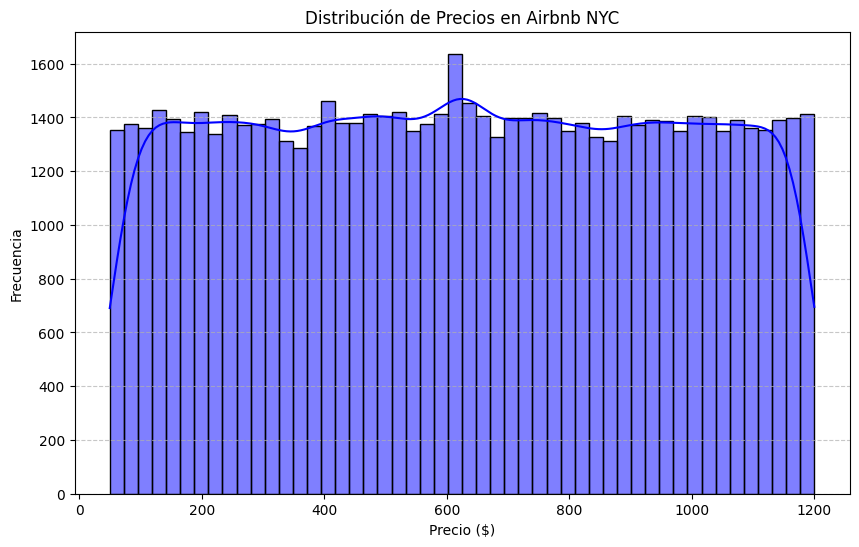

In [18]:
# Visualización de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title("Distribución de Precios en Airbnb NYC")
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 1️⃣ Análisis Univariante (Histogramas, Boxplot, Countplot)
Analizamos la distribución de cada variable individualmente.

In [19]:
# Variables numéricas para Histogramas y Boxplots


In [20]:
numerical_columns = df.select_dtypes(exclude=['object', 'category']).columns.to_list() # np.number alternativa
print(numerical_columns)
print(len(numerical_columns))
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()
print(categorical_columns)
print(len(categorical_columns))

['lat', 'long', 'instant_bookable', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'review_year', 'review_month', 'review_day']
15
['name', 'host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'cancellation_policy', 'room_type', 'house_rules']
7


<Figure size 800x500 with 0 Axes>

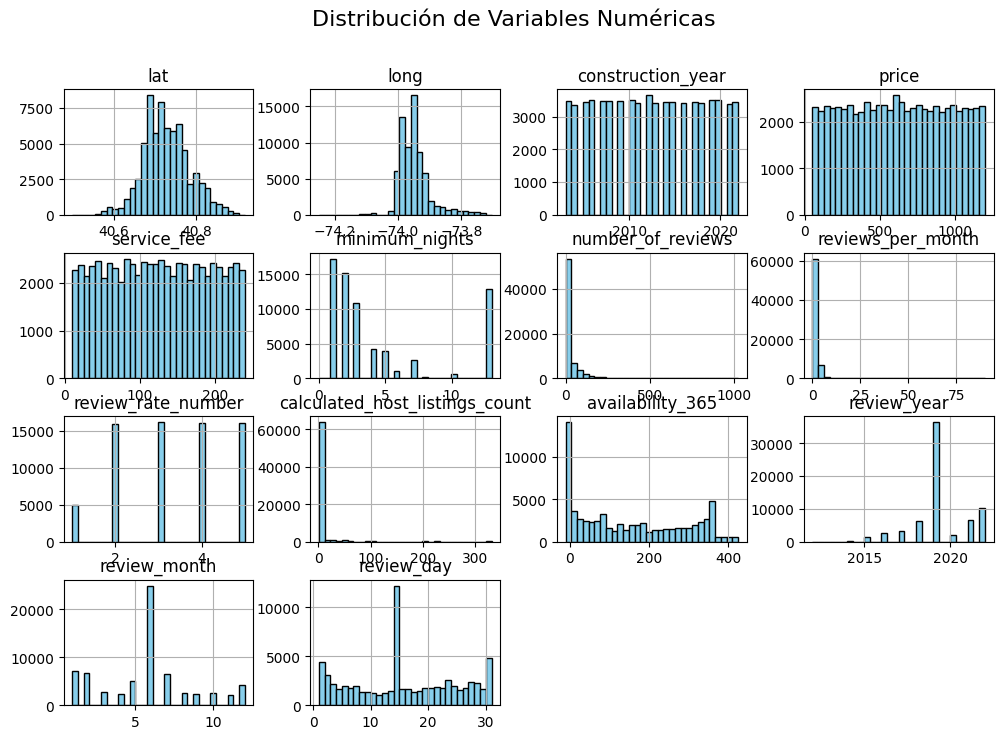

In [21]:
# Histograma para variables numéricas
plt.figure(figsize=(8, 5))
df[numerical_columns].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()


<Figure size 1500x800 with 0 Axes>

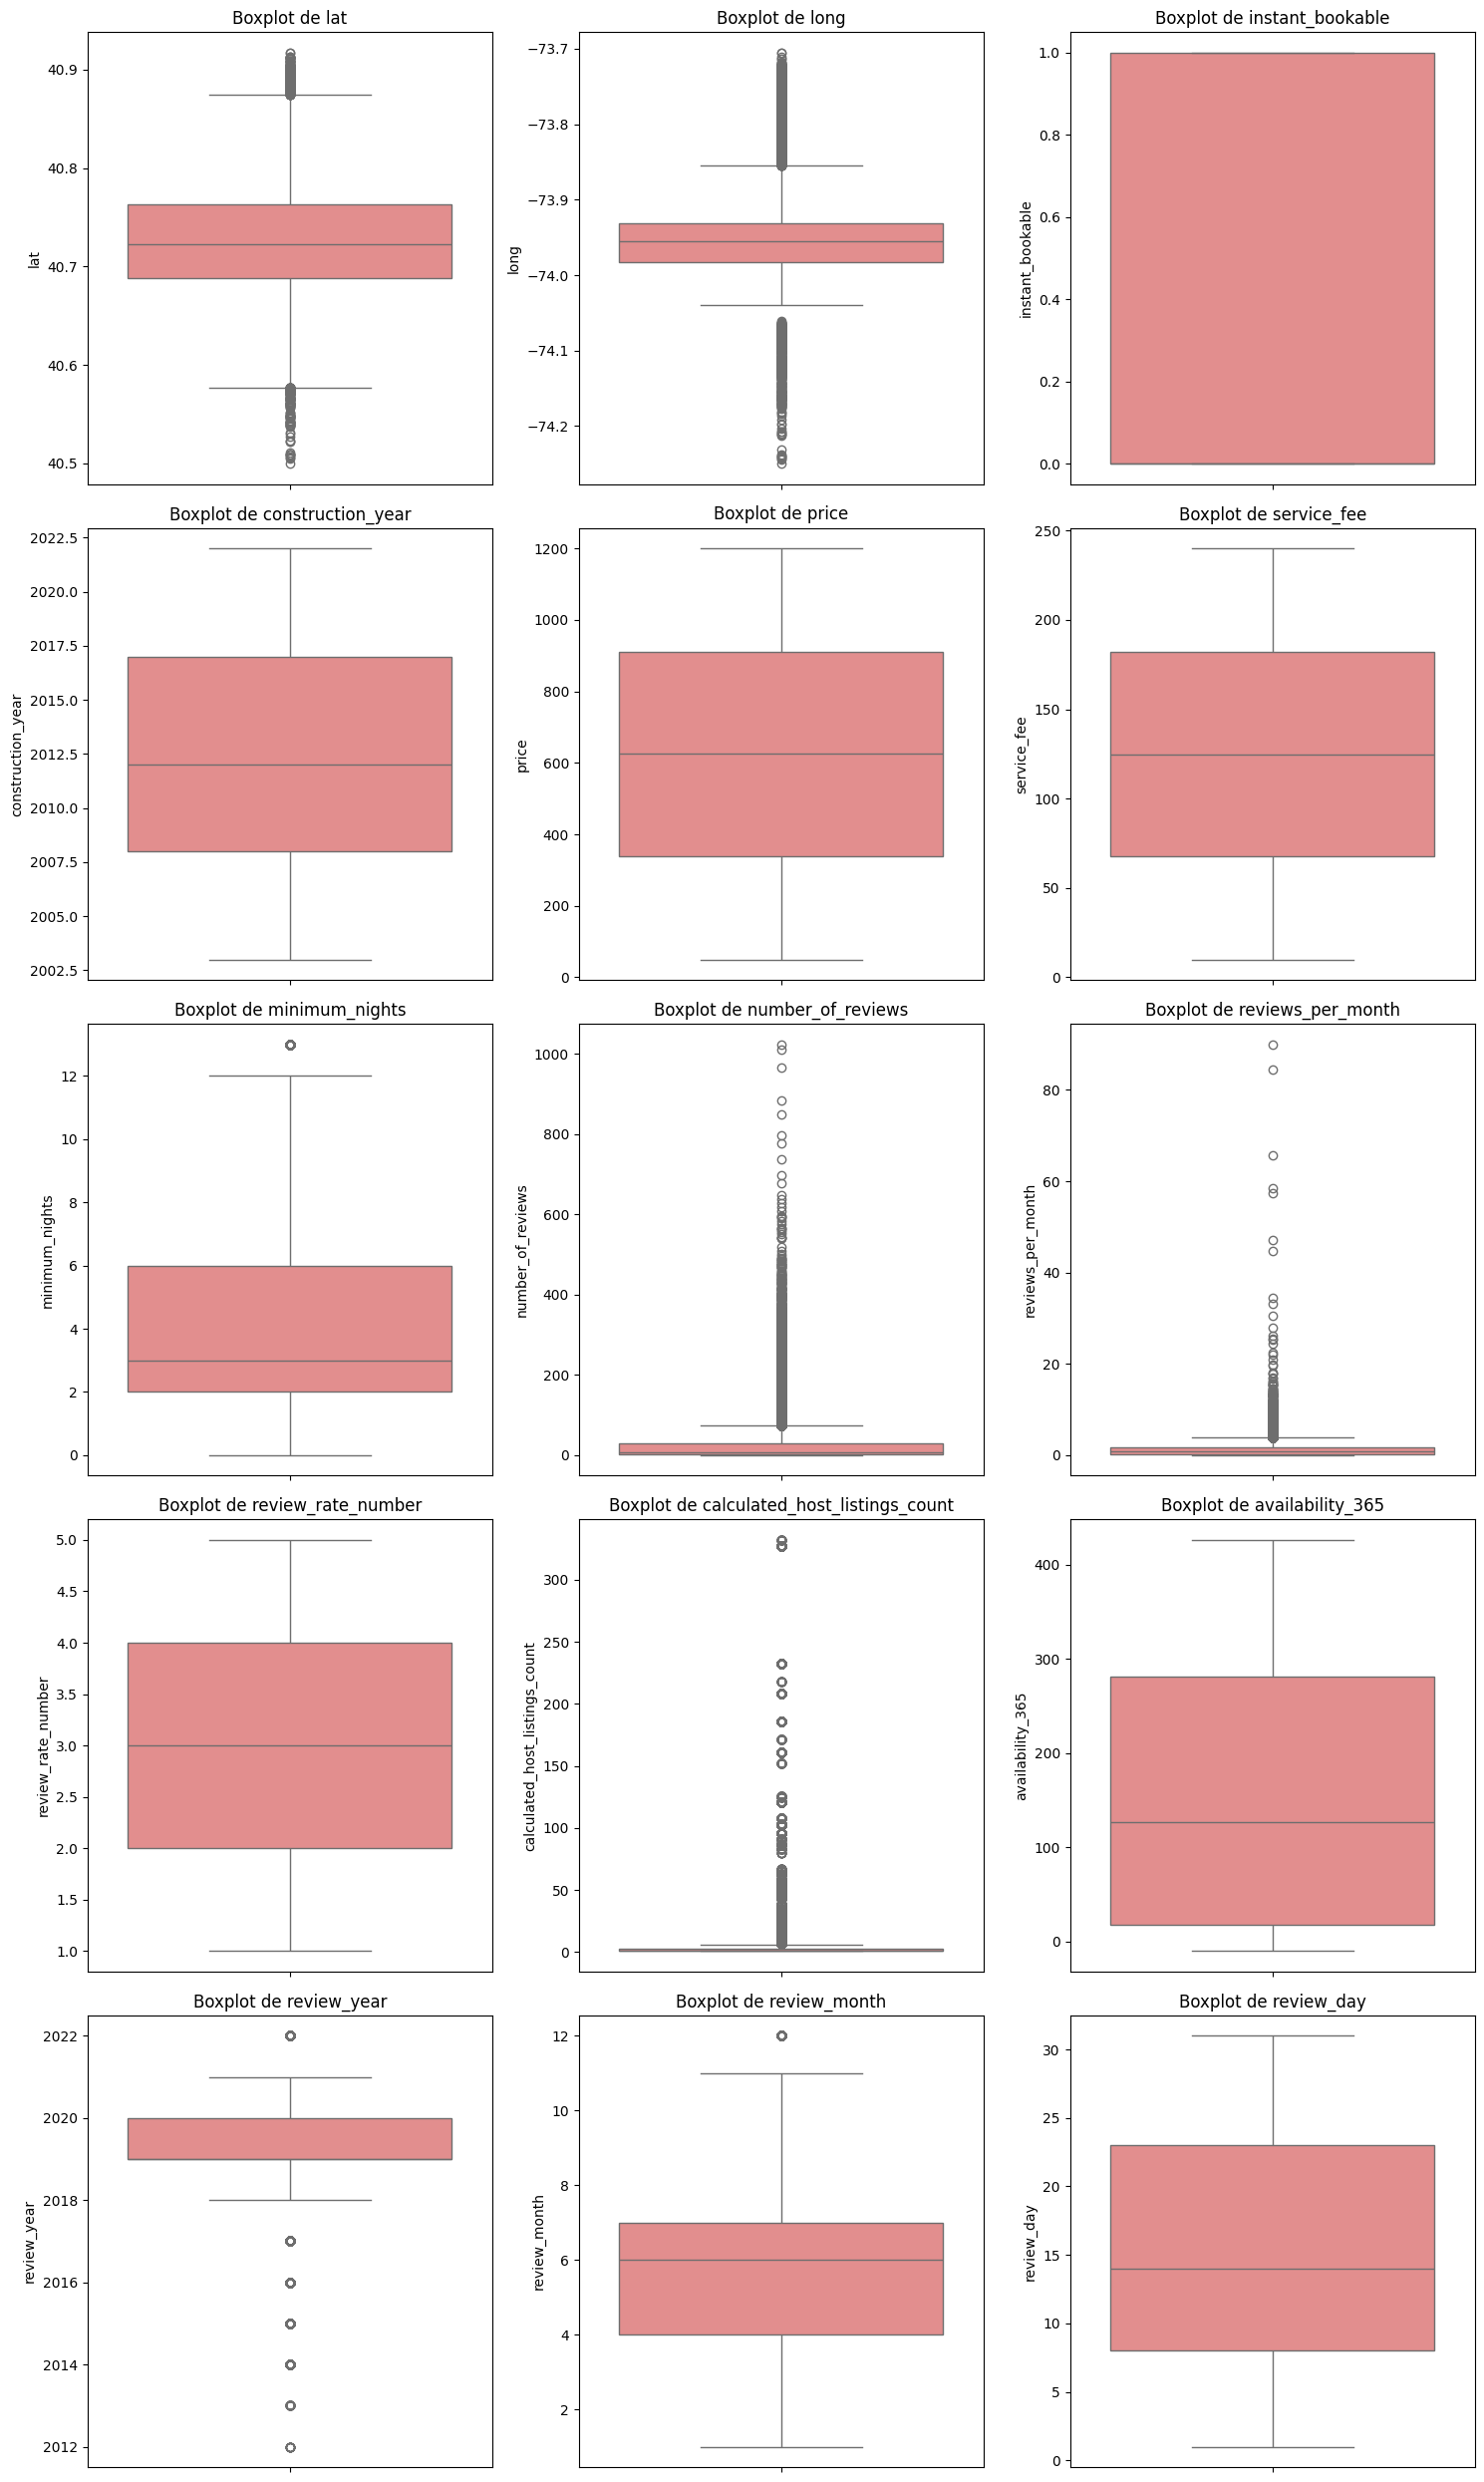

In [22]:
# Boxplots para detectar outliers
import math

plt.figure(figsize=(15,8))

# Definir número de filas y columnas dinámicamente
n_cols = 3  # Número de columnas fijas
n_rows = math.ceil(len(numerical_columns) / n_cols)  # Calcular filas necesarias

# Crear la figura y subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Asegurar que 'axes' sea un array unidimensional para iterar sin problemas
axes = axes.flatten()

# Iterar sobre las columnas numéricas y graficar boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], color='lightcoral', ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Eliminar subplots vacíos si hay menos columnas que espacios en la cuadrícula
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajustar el diseño para evitar sobreposiciones
plt.show()



In [24]:
print(axes)

[<Axes: title={'center': 'Boxplot de lat'}, ylabel='lat'>
 <Axes: title={'center': 'Boxplot de long'}, ylabel='long'>
 <Axes: title={'center': 'Boxplot de instant_bookable'}, ylabel='instant_bookable'>
 <Axes: title={'center': 'Boxplot de construction_year'}, ylabel='construction_year'>
 <Axes: title={'center': 'Boxplot de price'}, ylabel='price'>
 <Axes: title={'center': 'Boxplot de service_fee'}, ylabel='service_fee'>
 <Axes: title={'center': 'Boxplot de minimum_nights'}, ylabel='minimum_nights'>
 <Axes: title={'center': 'Boxplot de number_of_reviews'}, ylabel='number_of_reviews'>
 <Axes: title={'center': 'Boxplot de reviews_per_month'}, ylabel='reviews_per_month'>
 <Axes: title={'center': 'Boxplot de review_rate_number'}, ylabel='review_rate_number'>
 <Axes: title={'center': 'Boxplot de calculated_host_listings_count'}, ylabel='calculated_host_listings_count'>
 <Axes: title={'center': 'Boxplot de availability_365'}, ylabel='availability_365'>
 <Axes: title={'center': 'Boxplot de rev

In [25]:
print(categorical_columns)

['name', 'host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'cancellation_policy', 'room_type', 'house_rules']


In [26]:
for col in categorical_columns:
    print('________________________________________________________')
    print(f"Valores únicos en la columna '{col}':")
    print('cantidad de valores únicos:', len(df[col].unique()))
    print(f'Los valores únicos de de la columna {col} son:', df[col].unique())
    print()
    print(df[col].unique())
    print(f'usando value_counts: {df[col].value_counts()}')
    print()


________________________________________________________
Valores únicos en la columna 'name':
cantidad de valores únicos: 61234
Los valores únicos de de la columna name son: ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Spacious Loft Apartment  in Williamsburg!'
 '纽约三室一厅两全浴带独立厨房和停车位\r\nThree-Room Two Bath and Parking'
 'Secret Bushwick Bungalow']

['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Spacious Loft Apartment  in Williamsburg!'
 '纽约三室一厅两全浴带独立厨房和停车位\r\nThree-Room Two Bath and Parking'
 'Secret Bushwick Bungalow']
usando value_counts: name
blank                                                    208
Water View King Bed Hotel Room                            30
Home away from home                                       24
Hillside Hotel                                            18
Beautiful 2 Double Bed Hotel Room                         18
                      

In [27]:
'''# Definir número de columnas fijas y calcular filas necesarias
n_cols = 3  # Número de columnas por fila
n_rows = math.ceil(len(categorical_columns) / n_cols)  # Número de filas necesarias

# Crear figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Asegurar que los ejes sean 1D para iterar sin problemas
axes = axes.flatten()

# Iterar sobre las columnas categóricas y graficar countplots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, palette='pastel', ax=axes[i])
    axes[i].set_title(f"Frecuencia de {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas para mejor visibilidad

# Ocultar gráficos vacíos si hay menos columnas que subplots creados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño para mejor visibilidad
plt.tight_layout()
plt.show()'''


'# Definir número de columnas fijas y calcular filas necesarias\nn_cols = 3  # Número de columnas por fila\nn_rows = math.ceil(len(categorical_columns) / n_cols)  # Número de filas necesarias\n\n# Crear figura con subplots\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))\n\n# Asegurar que los ejes sean 1D para iterar sin problemas\naxes = axes.flatten()\n\n# Iterar sobre las columnas categóricas y graficar countplots\nfor i, col in enumerate(categorical_columns):\n    sns.countplot(data=df, x=col, palette=\'pastel\', ax=axes[i])\n    axes[i].set_title(f"Frecuencia de {col}")\n    axes[i].tick_params(axis=\'x\', rotation=45)  # Rotar etiquetas para mejor visibilidad\n\n# Ocultar gráficos vacíos si hay menos columnas que subplots creados\nfor j in range(i + 1, len(axes)):\n    fig.delaxes(axes[j])\n\n# Ajustar diseño para mejor visibilidad\nplt.tight_layout()\nplt.show()'

In [ ]:
# Countplots para variables categóricas
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f"Frecuencia de {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


C:\Users\carol\AppData\Local\Temp\ipykernel_25376\32294470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


KeyboardInterrupt: 

In [ ]:
print(len(numerical_columns))

15


In [ ]:
'''# Categorías y métricas a usar
categorias = categorical_columns
metricas = ['mean', 'min', 'max']
columnas_numericas = numerical_columns

# Crear una figura por cada métrica
for metrica in metricas:
    fig, axes = plt.subplots(len(categorias), len(columnas_numericas), figsize=(18, 12), constrained_layout=True)

    # Iterar sobre las categorías y columnas numéricas
    for i, categoria in enumerate(categorias):
        for j, columna in enumerate(columnas_numericas):
            # Agrupar por la categoría actual y calcular la métrica deseada
            grouped = df.groupby(categoria).agg({columna: metrica}).reset_index()
            
            # Crear el gráfico en el subplot correspondiente
            sns.barplot(data=grouped, x=categoria, y=columna, ax=axes[i, j], palette='viridis')
            
            # Configurar el título y las etiquetas
            axes[i, j].set_title(f"{metrica.title()} de {columna.title()} por {categoria.title()}")
            axes[i, j].set_xlabel(categoria.title())
            axes[i, j].set_ylabel(f"{metrica.title()} de {columna.title()}")
            axes[i, j].grid(axis='y', linestyle='--', alpha=0.7)

    # Configurar el título general de la figura
    plt.suptitle(f"Gráficos de {metrica.title()} por Categorías", fontsize=16, y=1.02)
    
    # Mostrar la figura completa
    plt.show()'''

C:\Users\carol\AppData\Local\Temp\ipykernel_15000\84859029.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=categoria, y=columna, ax=axes[i, j], palette='viridis')
C:\Users\carol\AppData\Local\Temp\ipykernel_15000\84859029.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=categoria, y=columna, ax=axes[i, j], palette='viridis')
C:\Users\carol\AppData\Local\Temp\ipykernel_15000\84859029.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=categoria, y=columna, ax=axes[i, j], palette='virid

KeyboardInterrupt: 

C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\caro

In [ ]:
'''# Categorías y columnas a usar
categorias = categorical_columns
columnas_numericas = numerical_columns
metricas = ['mean', 'min', 'max']

# Configurar la figura con subplots (3x3)
fig, axes = plt.subplots(len(categorias), len(columnas_numericas), figsize=(18, 12), constrained_layout=True)

# Iterar sobre las categorías y columnas numéricas
for i, categoria in enumerate(categorias):
    for j, columna in enumerate(columnas_numericas):
        # Crear el histograma con hue
        sns.histplot(
            data=df, 
            x=columna, 
            hue=categoria, 
            kde=True, 
            bins=30, 
            palette='Set1', 
            ax=axes[i, j],
            element='step'
        )
        
        # Calcular y agregar métricas
        grouped = df.groupby(categoria)[columna].agg(metricas).reset_index()
        for metric, style, color in zip(metricas, ['--', '-.', ':'], ['red', 'green', 'blue']):
            for cat, value in zip(grouped[categoria], grouped[metric]):
                axes[i, j].axvline(
                    value, 
                    color=color, 
                    linestyle=style, 
                    linewidth=1.5, 
                    label=f'{metric.capitalize()} ({cat})'
                )

        # Configurar título y etiquetas
        axes[i, j].set_title(f"{columna.title()} por {categoria.title()}")
        axes[i, j].set_xlabel(columna.title())
        axes[i, j].set_ylabel("Frecuencia")
        axes[i, j].grid(axis='y', linestyle='--', alpha=0.7)

        # Mostrar una leyenda única por cada subplot
        if i == len(categorias) - 1 and j == 0:  # Colocar leyenda solo en el primer gráfico
            axes[i, j].legend(title="Métricas", loc='upper right', fontsize=8)

# Mostrar la figura completa
plt.suptitle("Histogramas Agrupados con Métricas Adicionales", fontsize=16, y=1.02)
plt.show()'''

NameError: name 'categorical_columns' is not defined

In [ ]:
%%time

'''# Categorías y columnas a usar
categorias = categorical_columns
columnas_numericas = numerical_columns

# Configurar la figura con subplots
fig, axes = plt.subplots(len(categorias), len(columnas_numericas), figsize=(18, 12), constrained_layout=True)

# Iterar sobre las categorías y columnas numéricas
for i, categoria in enumerate(categorias):
    for j, columna in enumerate(columnas_numericas):
        # Crear el gráfico en el subplot correspondiente
        sns.histplot(
            data=df, 
            x=columna, 
            hue=categoria, 
            kde=True, 
            bins=30, 
            palette='Set1', 
            ax=axes[i, j],
            element='step'
        )
        
        # Configurar el título y las etiquetas
        axes[i, j].set_title(f"{columna.title()} por {categoria.title()}")
        axes[i, j].set_xlabel(columna.title())
        axes[i, j].set_ylabel("Frecuencia")
        axes[i, j].grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la figura completa
plt.suptitle("Histogramas Agrupados por Categorías", fontsize=16, y=1.02)
plt.show()'''

KeyboardInterrupt: 

C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.on\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 38748 (\N{CJK UNIFIED IDEOGRAPH-975C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\

Error in callback <function _draw_all_if_interactive at 0x000002601CBCCE00> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
Dominiq's NY cosy 3bedrm crashpad*metro*wifi*$$ale
                                             ^
ParseException: Expected end of text, found '$'  (at char 45), (line:1, col:46)

C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from font(s) DejaVu Sans.on\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38748 (\N{CJK UNIFIED IDEOGRAPH-975C}) missing from font(s) DejaVu San

ValueError: 
Dominiq's NY cosy 3bedrm crashpad*metro*wifi*$$ale
                                             ^
ParseException: Expected end of text, found '$'  (at char 45), (line:1, col:46)

<Figure size 1800x1200 with 60 Axes>

In [ ]:
# Cuartiles e IQR
def cuartiles_iqr(dataframe, columna):
    # Cálculo de Q1, Q3 e IQR
    Q1 = np.percentile(dataframe[columna], 25)  # Primer cuartil
    Q2 = np.percentile(dataframe[columna], 50)  # Segundo cuartil == mediana
    Q3 = np.percentile(dataframe[columna], 75)  # Tercer cuartil
    IQR = Q3 - Q1 # Rango intercuartílico
    print("Cuartiles e IQR:")
    print(f"Q1: {Q1}, Q2 (mediana): {Q2}, Q3: {Q3}")
    print(f"IQR: {IQR}")
    return Q1, Q2, Q3, IQR

Q1, Q2, Q3, IQR = cuartiles_iqr(df, 'price')
print("------------------------------------------------")

Cuartiles e IQR:
Q1: 339.0, Q2 (mediana): 624.7360700839849, Q3: 911.0
IQR: 572.0
------------------------------------------------


In [ ]:
# Filtrar por porcentaje
def filtrar_por_porcentaje(dataframe, columna):
    sorted_values = np.sort(dataframe[columna])   # Ordenar los valores de la columna
    # Calcular los percentiles
    bottom_20_percent = np.percentile(sorted_values, 20)
    top_20_percent = np.percentile(sorted_values, 80)
    
    # Filtrar precios según los percentiles
    bottom_prices = dataframe[dataframe[columna]<= bottom_20_percent]
    top_prices = dataframe[dataframe[columna] >= top_20_percent]

    # Imprimir resultados
    print(f"Filtrar columna {columna} por porcentaje:")
    print(f"Percentil 20: {bottom_20_percent:.2f}")
    print(f"Percentil 80: {top_20_percent:.2f}")
    print(f"Cantidad en el 20% más barato: {len(bottom_prices)}")
    print(f"Cantidad en el 20% más caro: {len(top_prices)}")
   
    return top_prices, bottom_prices, top_20_percent, bottom_20_percent

# Llamar a la función con el DataFrame y la columna 'price'
top_prices, bottom_prices, top_20_percent, bottom_20_percent = filtrar_por_porcentaje(df, 'price')
print("------------------------------------------------")

Filtrar columna price por porcentaje:
Percentil 20: 281.00
Percentil 80: 969.00
Cantidad en el 20% más barato: 13914
Cantidad en el 20% más caro: 13874
------------------------------------------------


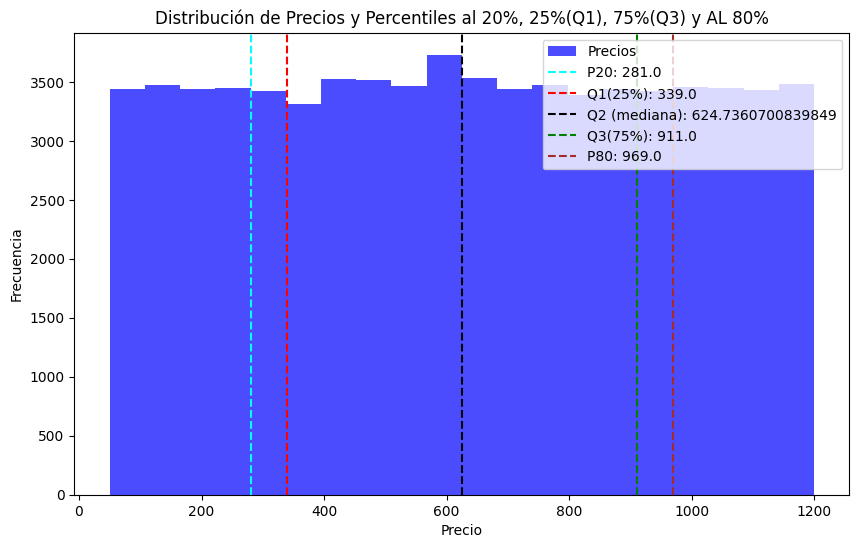

In [ ]:
# histograma para visualizar los datos y marcar los percentiles:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='blue', alpha=0.7, label='Precios')
plt.axvline(bottom_20_percent, color='cyan', linestyle='--', label=f'P20: {bottom_20_percent}')
plt.axvline(Q1, color='red', linestyle='--', label=f'Q1(25%): {Q1}')
plt.axvline(Q2, color='black', linestyle='--', label=f'Q2 (mediana): {Q2}')
plt.axvline(Q3, color='green', linestyle='--', label=f'Q3(75%): {Q3}')
plt.axvline(top_20_percent, color='brown', linestyle='--', label=f'P80: {top_20_percent}')
plt.title("Distribución de Precios y Percentiles al 20%, 25%(Q1), 75%(Q3) y AL 80%")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [ ]:
# Varianza y desviación estándar
def varianza_desviacion(columna):
    variance = np.var(columna)
    std_dev = np.std(columna)
    print(f"Varianza: {variance:.2f}, Desviación estándar: {std_dev:.2f}")
    return variance, std_dev

# Llamar a la función con la columna 'price'
variance, std_dev = varianza_desviacion(df['price'])
print("------------------------------------------------")

Varianza: 109664.66, Desviación estándar: 331.16
------------------------------------------------


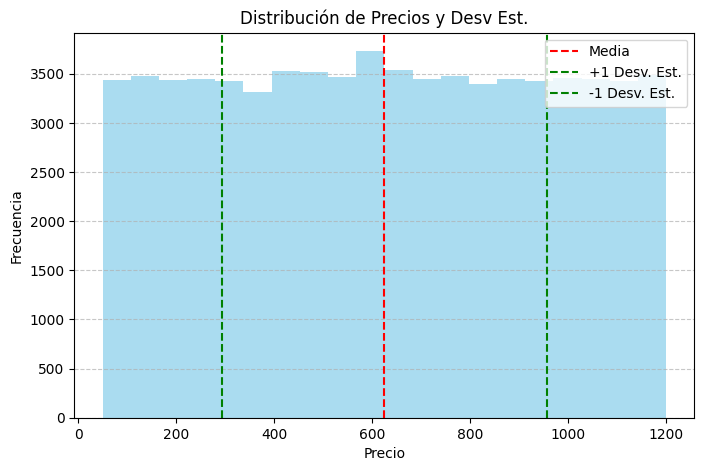

In [ ]:
# histograma o boxplot para visualizar la dispersión de los datos:
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=20, color='skyblue', alpha=0.7)
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df['price'].mean() + std_dev, color='green', linestyle='--', label='+1 Desv. Est.')
plt.axvline(df['price'].mean() - std_dev, color='green', linestyle='--', label='-1 Desv. Est.')
plt.title("Distribución de Precios y Desv Est.")

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Transformando distribución de la columna 'price'


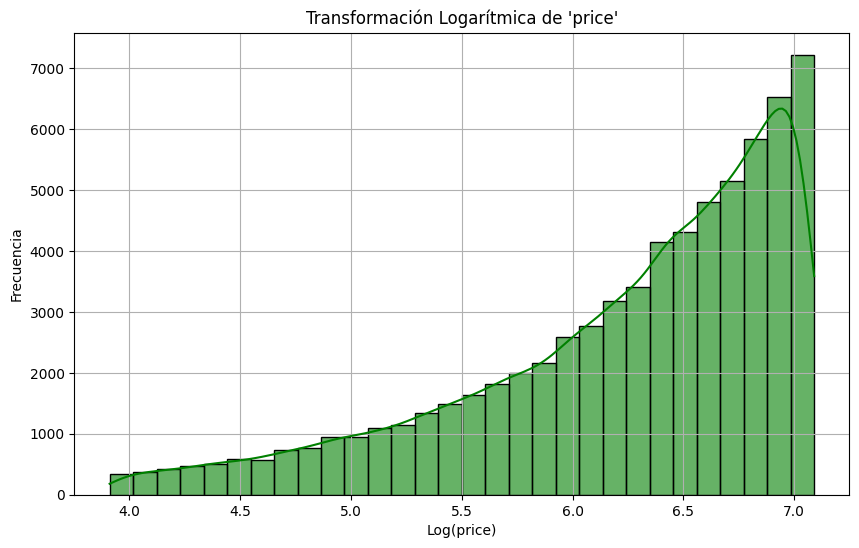

------------------------------------------------
Valores transformados (log):
0        6.873164
1        4.955827
2        6.429719
3        5.908083
4        5.318120
           ...   
69300    6.437329
69301    6.437329
69302    6.437329
69303    6.437329
69304    6.437329
Name: price, Length: 69305, dtype: float64


In [ ]:
# Transformar distribuciones
def transformar_distribuciones(dataframe, columna):
    print(f"Transformando distribución de la columna '{columna}'")
    # Filtrar valores positivos (aunque sepamos que todos los precios lo son)
    valores_positivos = dataframe[columna][dataframe[columna] > 0]
    
    # Aplicar transformación logarítmica
    log_transformation = np.log(valores_positivos)
    
    # Gráfico de la distribución transformada
    plt.figure(figsize=(10, 6))
    sns.histplot(log_transformation, kde=True, bins=30, color="green", alpha=0.6)
    plt.title(f"Transformación Logarítmica de '{columna}'")
    plt.xlabel(f"Log({columna})")
    plt.ylabel("Frecuencia")
    plt.grid()
    plt.show()
    
    # Retornar la transformación
    return log_transformation

# Llamar a la función con la columna 'price'
price_log = transformar_distribuciones(df, 'price')
print("------------------------------------------------")

# Mostrar los datos transformados
print("Valores transformados (log):")
print(price_log)

<Axes: ylabel='Density'>

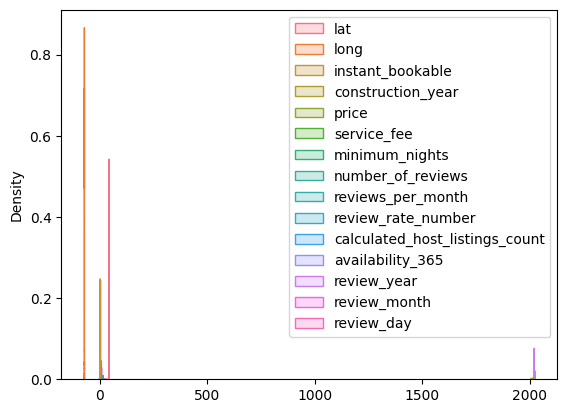

In [ ]:
sns.kdeplot(df, fill=True, thresh=0.01, cbar=True) #hay escalas diferentes en los datos, mejor filtar para alguna columna

Tenemos las columnas numéricas en el dataframe: Index(['lat', 'long', 'construction_year', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'review_year', 'review_month', 'review_day'],
      dtype='object')
Tenemos 14 columnas numéricas
Tenemos 14 columnas numéricas con más de un valor único
3
5
El eje x del histograma de lat va desde 40.49979 hasta  40.91697 con un ancho de columna 40.49979
El eje x del histograma de long va desde -74.24984 hasta  -73.70522 con un ancho de columna -74.24984
El eje x del histograma de construction_year va desde 2003.0 hasta  2022.0 con un ancho de columna 2003.0
El eje x del histograma de price va desde 50.0 hasta  1200.0 con un ancho de columna 50.0
El eje x del histograma de service_fee va desde 10.0 hasta  240.0 con un ancho de columna 10.0
El eje x del histograma de minimum_nights va desde 0.0 hasta  13.0 con un ancho

C:\Users\carol\AppData\Local\Temp\ipykernel_37456\22397102.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


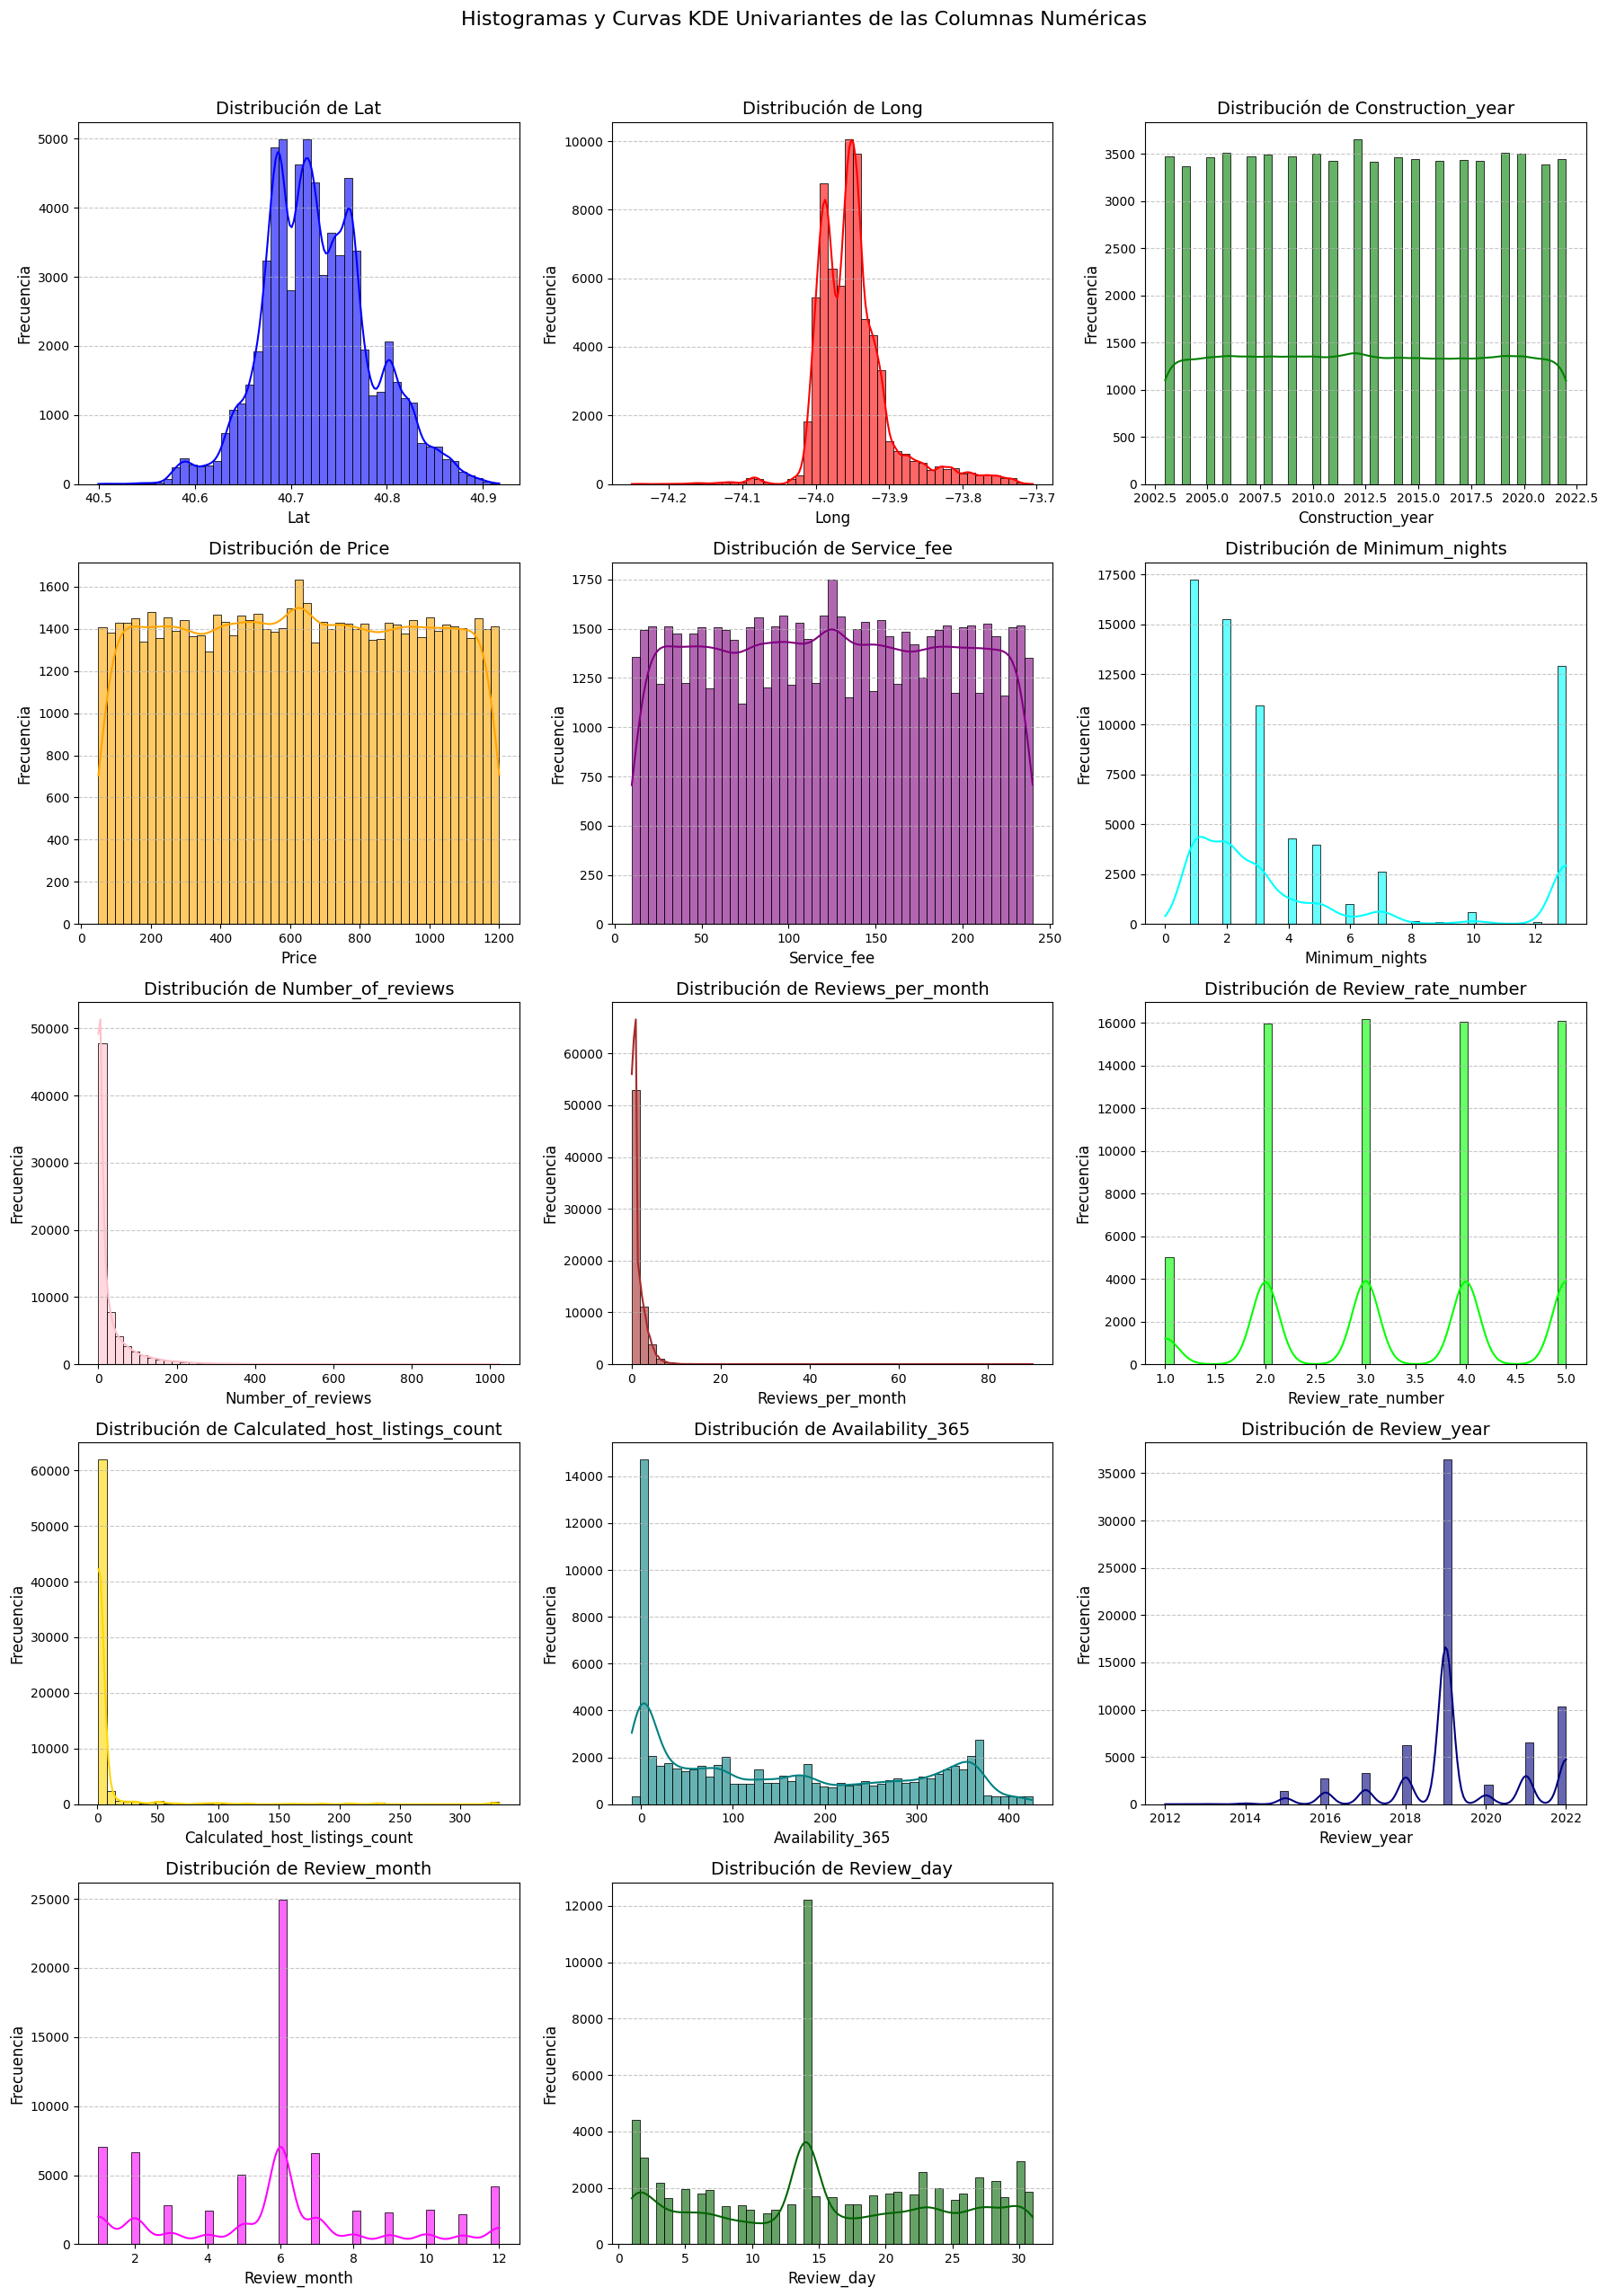

In [ ]:
# Seleccionar las columnas numéricas del DataFrame
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
print(f'Tenemos las columnas numéricas en el dataframe: {numerical_columns}')
print(f'Tenemos {len(numerical_columns)} columnas numéricas')

# Filtrar las columnas con más de 3 valores únicos, para no imprimir la columna del IVA, ni las de los descuentos
numerical_columns = [col for col in numerical_columns if df[col].nunique() > 3]
print(f'Tenemos {len(numerical_columns)} columnas numéricas con más de un valor único')

# Configurar la figura para varios subplots
n_cols = 3  # Número de columnas por fila
print(f'número de columnas del plot: {n_cols}')
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calcular el número de filas necesario
print(n_rows)
print(f'número de filas del plot: {n_rows}')

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Aplanar el arreglo de ejes
# Lista de colores
colores = [
    "blue", "red", "green", "orange", "purple", "cyan", 
    "pink", "brown", "lime", "gold", "teal", "navy", 
    "magenta", "darkgreen", "salmon"
]
# Iterar sobre las columnas numéricas y generar los histogramas
for i, column in enumerate(numerical_columns):  
    ax = axes[i]  # Subplot correspondiente
    # Rango de valores para ajustar el ancho
    col_min, col_max = df[column].min(), df[column].max()
    bins = np.linspace(col_min, col_max, 50)  # Crear bins uniformemente distribuidos
    print(f'El eje x del histograma de {column} va desde {col_min} hasta  {col_max} con un ancho de columna {bins[0]}')
    # Usar colores de la lista (repetir si se acaban los colores)
    color = colores[i % len(colores)]  # Asignar color
    sns.histplot(data=df, x=column, bins=bins, kde=True, color=color, alpha=0.6, ax=ax)
    ax.set_title(f"Distribución de {column.capitalize()}", fontsize=14)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ocultar subplots adicionales si sobran
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.suptitle("Histogramas y Curvas KDE Univariantes de las Columnas Numéricas", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
'''# HACER TODOS LOS BOXPLOT DE TODAS LAS COMBINACIONES
# Obtener las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"Columnas categóricas: {categorical_columns}")
print(f"Total de columnas categóricas: {len(categorical_columns)}")

# Generar combinaciones únicas manualmente
combinations = []
for x_col in categorical_columns:
    for y_col in categorical_columns:
        for hue_col in categorical_columns:
            if x_col != y_col and x_col != hue_col and y_col != hue_col:
                combinations.append((x_col, y_col, hue_col))

print(f"Total de combinaciones generadas: {len(combinations)}")

# Agrupar combinaciones por x_col
grouped_combinations = {}
for x_col, y_col, hue_col in combinations:
    if x_col not in grouped_combinations:
        grouped_combinations[x_col] = []
    grouped_combinations[x_col].append((y_col, hue_col))

# Generar figuras separadas por x_col
for x_col, group in grouped_combinations.items():
    print(f"Generando gráficos para {x_col}...")
    
    n_cols = 3  # Número de columnas por fila
    n_rows = (len(group) + n_cols - 1) // n_cols  # Calcular el número de filas necesario
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
    axes = axes.flatten()  # Aplanar el arreglo de ejes
    
    for idx, (y_col, hue_col) in enumerate(group):
        ax = axes[idx]
        
        # Crear el boxplot
        sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col, palette='Set2', ax=ax)
        
        # Configurar el título y etiquetas
        ax.set_title(f"{y_col} por {x_col} con {hue_col}", fontsize=14)
        ax.set_xlabel(x_col.capitalize(), fontsize=12)
        ax.set_ylabel(y_col.capitalize(), fontsize=12)
        ax.legend(title=hue_col.capitalize(), loc='upper right')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ocultar subplots adicionales si sobran
    for j in range(len(group), len(axes)):
        fig.delaxes(axes[j])
    
    # Guardar la figura como archivo
    filename = f"boxplot_{x_col}.png"
    plt.suptitle(f"Gráficos para {x_col.capitalize()}", fontsize=16, y=1.02)
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    print(f"Gráfico guardado como: {filename}")
   
    # Mostrar la figura
    plt.suptitle(f"Gráficos para {x_col.capitalize()}", fontsize=16, y=1.02)
    plt.show()'''

Columnas categóricas: Index(['name', 'host_identity_verified', 'neighbourhood_group',
       'neighbourhood', 'cancellation_policy', 'room_type', 'house_rules'],
      dtype='object')
Total de columnas categóricas: 7
Total de combinaciones generadas: 210
Generando gráficos para name...


### 2️⃣ Análisis Bivariante (Scatterplots)
Analizamos relaciones entre dos variables.

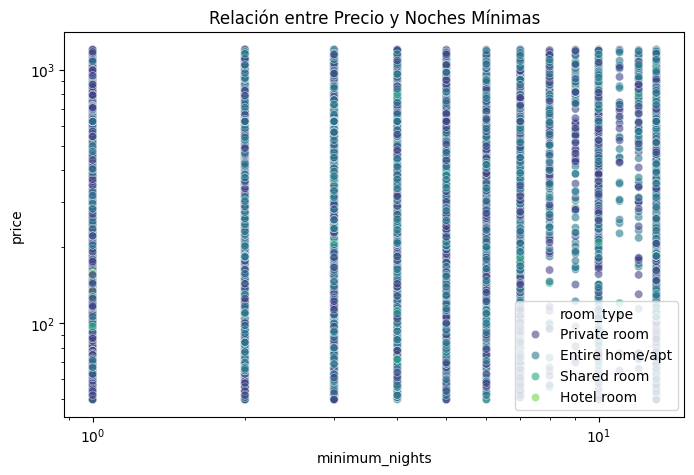

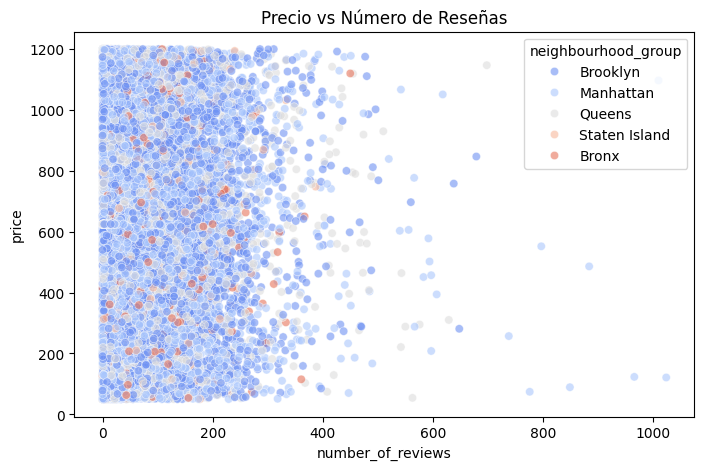

In [ ]:
# 🔹 Scatterplot: Precio vs Mínimo de Noches
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='minimum_nights', y='price', hue='room_type', alpha=0.6, palette='viridis')
plt.title("Relación entre Precio y Noches Mínimas")
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.yscale("log")
plt.show()

# 🔹 Scatterplot: Precio vs Número de Reseñas
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group', alpha=0.6, palette='coolwarm')
plt.title("Precio vs Número de Reseñas")
plt.show()


### 3️⃣ Análisis Multivariante (Heatmap, Pairplot)
Exploramos correlaciones y relaciones entre múltiples variables.

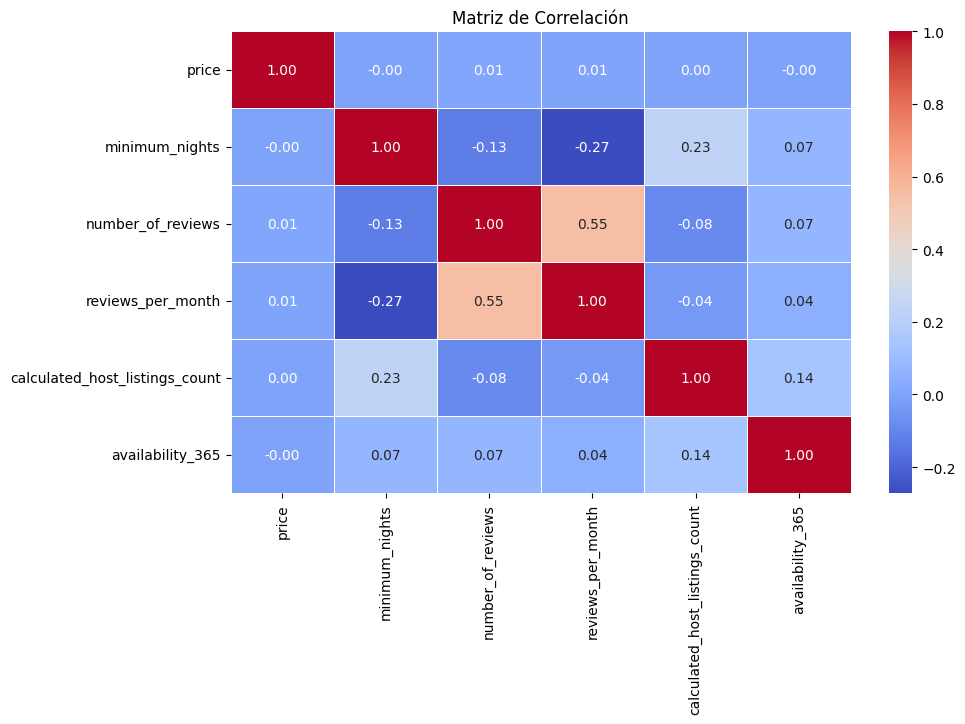

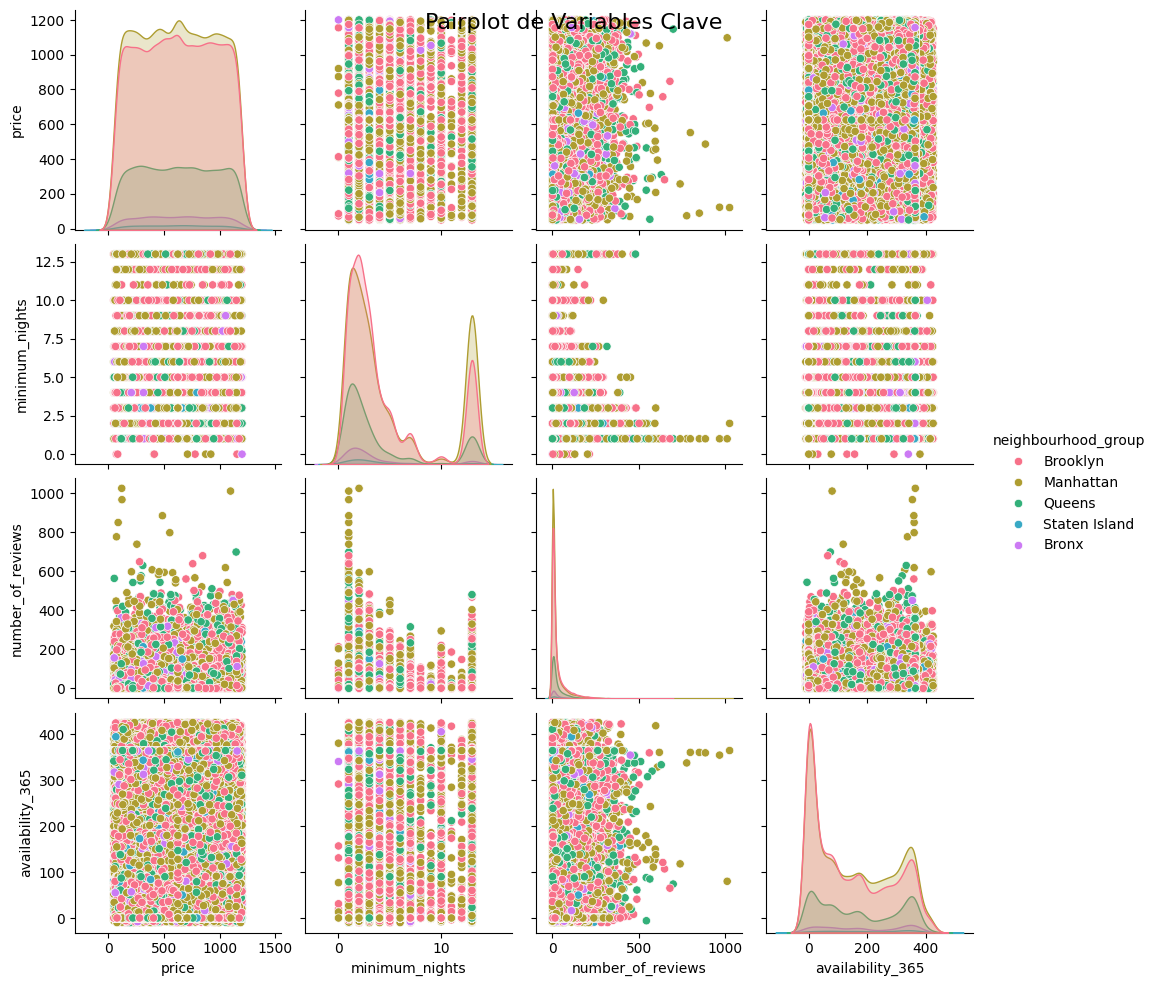

In [ ]:
# 🔹 Matriz de Correlación (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# 🔹 Pairplot para visualizar relaciones entre variables clave
sns.pairplot(df, vars=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue="neighbourhood_group", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot de Variables Clave", fontsize=16)
plt.show()


## * Preprocesados (20%)

 Preprocesamiento de Datos con Scikit-Learn
En este paso, aplicaremos imputación, escalado y codificación a las columnas numéricas y categóricas del dataset, siguiendo las mejores prácticas para Machine Learning.


### 1️⃣ Preprocesamiento de Variables Numéricas
Aplicamos: ✅ Imputer para rellenar valores nulos.
✅ Scaler para normalizar los valores y mejorar el rendimiento de los modelos.
✅ Transformer para realizar transformaciones adicionales si es necesario.

In [ ]:
# 🔹 Seleccionar columnas numéricas
num_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# 🔹 Pipeline de preprocesamiento numérico
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Reemplaza nulos con la mediana
    ('scaler', StandardScaler())  # Normalización estándar
])

# 🔹 Aplicar transformación
df[num_features] = num_pipeline.fit_transform(df[num_features])
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,1.030521,193.0,1.234760,-0.365215,2021-10-19,-0.657858,4.0,-0.085519,0.988062,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,-1.457728,28.0,1.923330,0.326630,2022-05-21,-0.555398,4.0,-0.200434,0.556580,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,-0.014302,124.0,-0.371904,-0.538176,2019-06-14,-0.308287,5.0,-0.229163,1.479059,"I encourage you to use my kitchen, cooking and..."
3,1002755,blank,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,-0.775271,74.0,1.923330,4.650658,2019-07-05,2.012142,4.0,-0.229163,1.255879,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,-1.270505,41.0,1.234760,-0.365215,2018-11-19,-0.724156,3.0,-0.229163,1.010380,"Please no smoking in the house, porch or on th..."


### 2️⃣ Preprocesamiento de Variables Categóricas
✅ Imputación de nulos en columnas categóricas.
✅ Codificación con OrdinalEncoder o OneHotEncoder según corresponda.



In [ ]:
# 🔹 Seleccionar columnas categóricas
cat_features_ordinal = ['room_type']  # Se puede codificar de forma ordinal
cat_features_onehot = ['neighbourhood_group', 'neighbourhood']  # Se codificará con OneHotEncoder

# 🔹 Pipeline de codificación ordinal
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputa con la moda
    ('encoder', OrdinalEncoder())  # Codificación ordinal
])

# 🔹 Pipeline de OneHotEncoder
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputa con la moda
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # OneHotEncoder
])

# 🔹 Aplicar transformaciones
df[cat_features_ordinal] = ordinal_pipeline.fit_transform(df[cat_features_ordinal])
df_onehot = onehot_pipeline.fit_transform(df[cat_features_onehot])

# Convertir OneHotEncoder a DataFrame
df_onehot = pd.DataFrame(df_onehot, columns=onehot_pipeline.named_steps['encoder'].get_feature_names_out(cat_features_onehot))

# Concatenar con el dataset original y eliminar las columnas originales
df = pd.concat([df, df_onehot], axis=1).drop(columns=cat_features_onehot)




### 3️⃣ Resumen del Preprocesamiento
✅ Columnas Numéricas: Se ha aplicado imputación y escalado con SimpleImputer y StandardScaler.
✅ Columnas Categóricas:

OrdinalEncoder para room_type.
OneHotEncoder para neighbourhood_group y neighbourhood.
🚀 Ahora los datos están listos para la siguiente fase de análisis y modelado! 

###    * Si queremos codificar de forma ordinal columnas de la entrada X : OrdinalEncoder: 0, 1, 2, 3, 4,5 ,6....


###    * OneHotEncoder en la entrada para no introducir orden ficticio, si esto genera muchas columnas luego podemos usar PCA o SelectKBest para reducirlas


In [ ]:
# Mostrar cambios realizados en el dataset
# Verificar si las columnas numéricas han sido transformadas
num_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']
num_summary = df[num_features].describe()

# Verificar la transformación de variables categóricas
cat_features_ordinal = ['room_type']
cat_features_onehot = ['neighbourhood_group', 'neighbourhood']
cat_summary_ordinal = df[cat_features_ordinal].head()

# Mostrar la presencia de las columnas OneHotEncoded
onehot_columns = [col for col in df.columns if any(feat in col for feat in cat_features_onehot)]
onehot_summary = df[onehot_columns].head()

import ace_tools as tools

tools.display_dataframe_to_user(name="Resumen de cambios en variables numéricas", dataframe=num_summary)
tools.display_dataframe_to_user(name="Muestra de variables categóricas transformadas (OrdinalEncoder)", dataframe=cat_summary_ordinal)
tools.display_dataframe_to_user(name="Muestra de variables categóricas transformadas (OneHotEncoder)", dataframe=onehot_summary)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# Recargar dataset después del reinicio del estado

# Cargar el dataset
df = pd.read_csv(file_path)

# Verificar los cambios en el dataset

# Verificar si las columnas numéricas han sido transformadas
num_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']
num_summary = df[num_features].describe()

# Verificar la transformación de variables categóricas
cat_features_ordinal = ['room_type']
cat_features_onehot = ['neighbourhood_group', 'neighbourhood']
cat_summary_ordinal = df[cat_features_ordinal].head()

# Mostrar la presencia de las columnas OneHotEncoded
onehot_columns = [col for col in df.columns if any(feat in col for feat in cat_features_onehot)]
onehot_summary = df[onehot_columns].head()

import ace_tools as tools
tools.display_dataframe_to_user(name="Resumen de cambios en variables numéricas", dataframe=num_summary)
tools.display_dataframe_to_user(name="Muestra de variables categóricas transformadas (OrdinalEncoder)", dataframe=cat_summary_ordinal)
tools.display_dataframe_to_user(name="Muestra de variables categóricas transformadas (OneHotEncoder)", dataframe=onehot_summary)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/AB_NYC_2019.csv'

## * clustering y siluetas (10 %)
###    * Crear una columna cluster usando KMeans o cualquier otro algoritmo de Clustering
###    * Usar esa columna para hacer algún gráfico EDA como hue para colorear con scatterplot
## * feature selection (10%)
###    * SelectKBest para filtrar las mejores columnas y probar - Probar este para regresión
###    * PCA - Probar este para clasificación
###    * probar los dos pero quedarse con uno, o comparar resultados con ambos
###    * Hay pocas columnas, por lo que esta fase no sería tan relevante
## * Regresión (20%):
###    * Predecir la columna 'price'
## * Clasificación multiclase (20%)
###    * Predecir la columna 'room_type'
## * Comparar resultados de modelos con validación cruzada (10 %)
###    * Mostrar un dataframe de resultados con las métricas calculadas
###    * Opcional: mostrar boxplot de los resultados de validación cruzada como tiempos de ejecución y predicción y métricas

## * Opcional:
###    * Uso de pipelines opcional:
####        * Opción 1: hacer las transformaciones por separado manualmente
####        * Opción 2: hacer las transformaciones con pipelines
####        * Opción 3: una primera parte con transformaciones manuales y una segunda parte con Pipeline
###        * En ambos casos sería interesante calcular las métricas para ver qué técnicas de preprocesado van mejor
###    * Vectorizar la columna texto 'name' y usar TruncatedSVD
###    * Clasificación multiclase 'room_type' o regresión sobre price con TensorFlow-Keras
###    * SMOTE si hay desbalanceo para el problema de clasificación multiclase 'room_type'
###    * Crear un apartado independiente donde se eliminen filas cuya last_review sea null, y trata la fecha por ejemplo con df['last_review].dt.year o month o day para sacar año mes y día y poder usarlos como 3 columnas de entrada.
###    * Transformar distribución de la variable objetivo 'price': En caso de querer transformar precio:
####        * manual sin pipeline:
#####            * train_test_split
#####            * hacer transformación de precio (por ejemplo logarítmica) para y_train
#####            * hacer fit: model.fit(X_train, y_train_log)
#####            * y_pred_log = model.predict
#####            * deshacer transformación precio: inverse_transform o np.exp(y_pred_log) para obtener y_pred normal
####        * automática con pipeline:
#####            * requiere de usar clase especial combinada con el pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html
###    * GridSearchCV para buscar mejores párametros en algún modelo